
# 🌍 Tutorial 02 — Time Series Analysis

In this notebook, you’ll learn how to work with **time-series data from ERA5** using `xarray`.
We will:
- Extract data for a specific location
- Explore temporal patterns
- Compute basic statistics
- Visualize results with line plots

> **Prerequisites:**
> - Completed Tutorial 01
> - Environment with `xarray` and `matplotlib`
> - ERA5 test dataset at `data/era5_sample.nc`


## 1. Open the Dataset

In [2]:

import xarray as xr
import matplotlib.pyplot as plt

# Open dataset
ds = xr.open_dataset("../data/era5_sample.nc")
ds


<xarray.Dataset> Size: 58MB
Dimensions:     (valid_time: 2, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 32B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 8MB ...
    v10         (valid_time, latitude, longitude) float32 8MB ...
    d2m         (valid_time, latitude, longitude) float32 8MB ...
    t2m         (valid_time, latitude, longitude) float32 8MB ...
    msl         (valid_time, latitude, longitude) float32 8MB ...
    sst         (valid_time, latitude, longitude) float32 8MB ...
    sp          (valid_time, latitude, longitude) float32 8MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T18:06 GRIB to CDM+CF via cfgrib-0.9.1...

## 2. Select a Variable and Location

In [3]:

# Select 2m temperature
t2m = ds['t2m']

# Example location: Athens, Greece (lat=37.98, lon=23.72)
t2m_point = t2m.sel(latitude=37.98, longitude=23.72, method="nearest")
t2m_point


<xarray.DataArray 't2m' (valid_time: 2)> Size: 8B
[2 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
    latitude    float64 8B 38.0
    longitude   float64 8B 23.75
    expver      (valid_time) <U4 32B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

## 3. Plot the Time Series

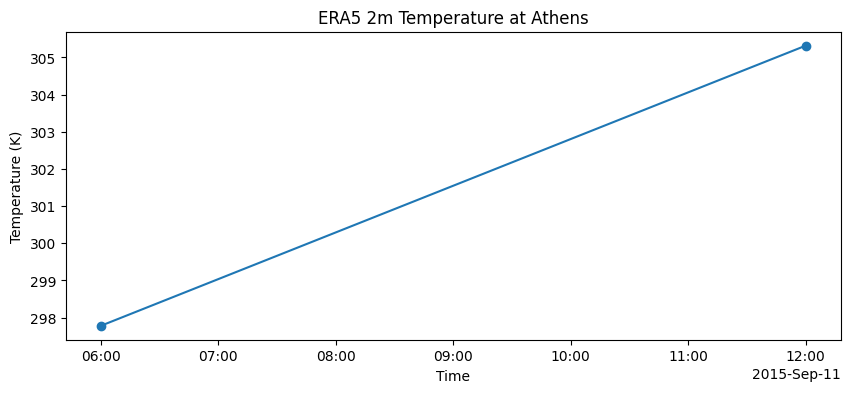

In [4]:

t2m_point.plot(marker="o", linestyle="-", figsize=(10,4))
plt.title("ERA5 2m Temperature at Athens")
plt.ylabel("Temperature (K)")
plt.xlabel("Time")
plt.show()


## 4. Compute Basic Statistics

In [5]:

print("Mean Temperature:", float(t2m_point.mean()))
print("Max Temperature:", float(t2m_point.max()))
print("Min Temperature:", float(t2m_point.min()))


Mean Temperature: 301.54864501953125
Max Temperature: 305.31610107421875
Min Temperature: 297.7811584472656


## 5. Compute Anomalies

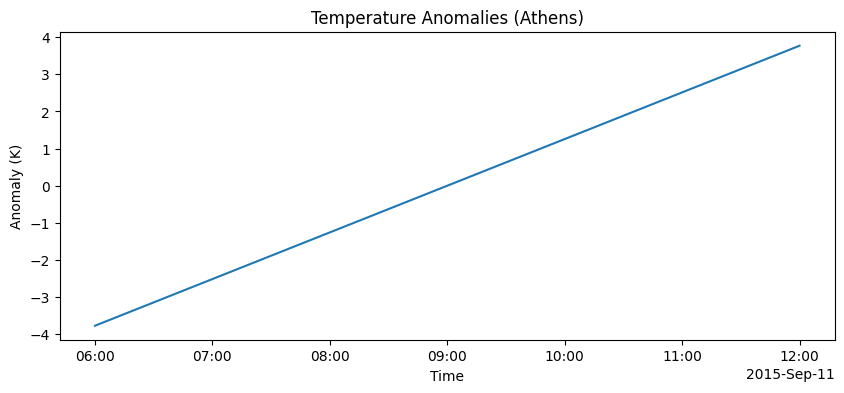

In [6]:

t2m_anomaly = t2m_point - t2m_point.mean()

t2m_anomaly.plot(figsize=(10,4))
plt.title("Temperature Anomalies (Athens)")
plt.ylabel("Anomaly (K)")
plt.xlabel("Time")
plt.show()


## 6. Regional Average (Optional)

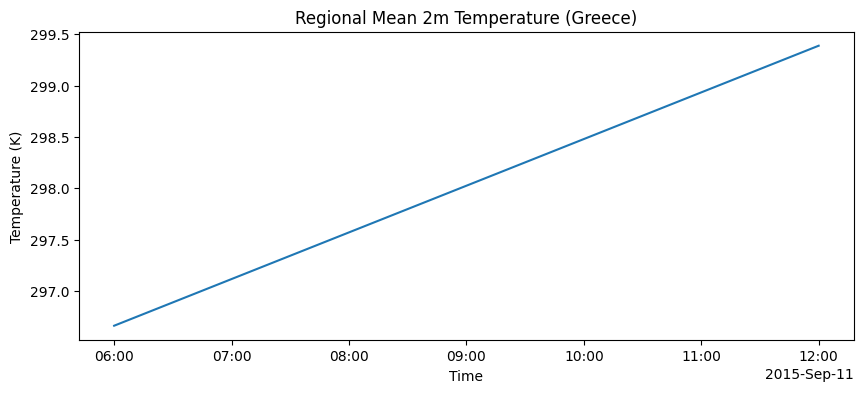

In [7]:

# Greece region: lat 34–42, lon 19–28
t2m_region = t2m.sel(latitude=slice(42, 34), longitude=slice(19, 28))
t2m_mean = t2m_region.mean(dim=["latitude", "longitude"])

t2m_mean.plot(figsize=(10,4))
plt.title("Regional Mean 2m Temperature (Greece)")
plt.ylabel("Temperature (K)")
plt.xlabel("Time")
plt.show()



---

## ✅ Summary
- Extracted a point time series using `.sel(latitude=..., longitude=..., method="nearest")`
- Plotted the time series and computed mean, min, and max
- Calculated and plotted anomalies
- (Optional) Computed a regional mean time series

**Next:** Proceed to Tutorial 03 — Preprocessing for Machine Learning.
